First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Column names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Distribution of spam and non-spam emails:
ham     4825
spam     747
Name: v1, dtype: int64


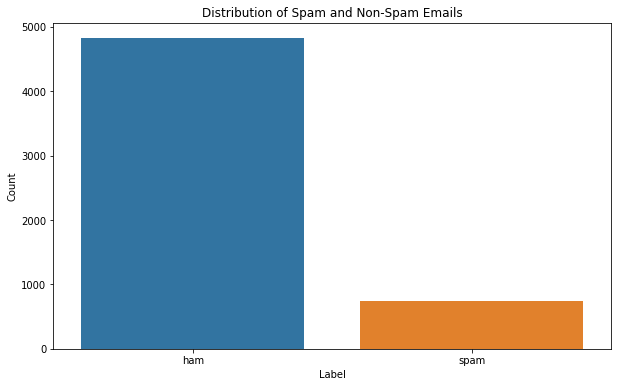

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress the warning about NumPy version
warnings.filterwarnings("ignore", message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the column names to identify the correct column for labels
print("Column names:", df.columns)

# Checking the distribution of spam and non-spam emails
# Replace 'v1' with the correct column name representing labels
spam_distribution = df['v1'].value_counts()
print("\nDistribution of spam and non-spam emails:")
print(spam_distribution)

# Visualizing examples of spam and non-spam emails
plt.figure(figsize=(10, 6))
sns.countplot(x='v1', data=df)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Prudhvi
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\Prudhvi
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\Prudhvi
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['processed_text'] = df['v2'].apply(preprocess_text)

# Convert text data into numerical feature vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_features.shape)


Shape of TF-IDF matrix: (5572, 8114)


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Selecting only 'v1' (labels) and 'v2' (text) columns

# Rename columns
df.columns = ['label', 'text']

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Convert text data into numerical feature vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_text'])
y = df['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9789095804352703
Testing Accuracy: 0.9695067264573991

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Accuracy: 0.9695067264573991
Precision: 1.0
Recall: 0.7733333333333333
F1-Score: 0.8721804511278195


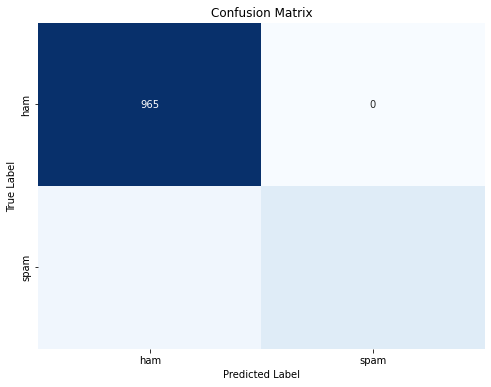

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label='spam')
recall = recall_score(y_test, y_pred_test, pos_label='spam')
f1 = f1_score(y_test, y_pred_test, pos_label='spam')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

# Load the dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# Select relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenization (word-level)
    tokens = text.split()
    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    # Stemming or Lemmatization
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Splitting the dataset into features (X) and target variable (y)
X = df['processed_text']
y = df['label'].map({'ham': 0, 'spam': 1})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

# Define the scoring metrics
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1_score': 'f1'}

# Evaluate performance using cross-validation
cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring)

print("\nCross-Validation Results:")
for metric, scores in cv_results.items():
    print(f"{metric}: {np.mean(scores):.3f} (±{np.std(scores):.3f})")


# Define the parameter grid for grid search
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found by grid search:")
print(grid_search.best_params_)

# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))



Cross-Validation Results:
fit_time: 6.645 (±0.183)
score_time: 0.492 (±0.046)
test_accuracy: 0.971 (±0.005)
test_precision: 0.973 (±0.013)
test_recall: 0.810 (±0.034)
test_f1_score: 0.883 (±0.022)
Best parameters found by grid search:
{'svm__C': 10, 'svm__kernel': 'rbf', 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [19]:
import joblib

# Save the trained model
joblib.dump(best_model, 'spam_detection_model.pkl')

# Later, when you want to use the model for prediction
# Load the saved model
loaded_model = joblib.load('spam_detection_model.pkl')

# Make predictions using the loaded model
new_email = ["Congratulations! You've won a free vacation. Click here to claim your prize!"]
predicted_label = loaded_model.predict(new_email)
print(predicted_label)


[1]
